In [1]:
ENV["JULIA_PKG_USE_CLI_GIT"] = "true"
cd("/leonardo_work/Sis25_degironc_0/apol/aceconverge2025/")
pwd()

import Pkg
Pkg.activate(".")
# Pkg.add(Pkg.PackageSpec(;name="ACEpotentials", version="0.6.7"))
using ACEpotentials

  Activating project at `/leonardo_work/Sis25_degironc_0/apol/aceconverge2025`


# Playground

In [2]:
traindir = "datasets/Tr124_dim.xyz"
traindir[1:end-4] * "_error_1"

"datasets/Tr124_dim_error_1"

In [3]:
potdir = "acejulia/potentials/Tr124_dim_border3.json"
potdir_nopot = replace(potdir, "/potentials" => "")

"acejulia/Tr124_dim_border3.json"

In [4]:
errdir = replace(potdir, "/potentials" => "/errors")

"acejulia/errors/Tr124_dim_border3.json"

In [ ]:
basis_bin = Dict()
orders = [2,3,3,3,4]
# orders = [4]
# degrees = [[45,24,12,12]]
# degrees = [[40,10],[40,10,9],[40,10,9,5]]
degrees = [[46,16],[46,16,12],[46,20,14],[46,24,16],[46,20,14,10]]
labels  = ["46.16","46.16.12","46.20.14","46.24.16","46.20.14.10"]
for (i,ord) in enumerate(orders)
    basis = ACE1x.ace_basis(
        elements = [:C],
        order = ord,
        totaldegree = degrees[i],
        rcut = 3.0,
        r0 = 1.0,
        pure = true)
    println(length(basis))
    basis_bin[labels[i]] = basis
    println("basis_bin[\"" * labels[i] * "\"]")
    @test basis isa ACE1x.ACEBasis
end

# basis = ACE1x.ace_basis(
#     elements = [:C],
#     order = 2,
#     totaldegree = 5,
#     rcut = rcut,
#     r0 = r0,
# )

[ Info: Option `pure = true` overrides `pure2b=true`


193
basis_bin["46.16"]


[ Info: Option `pure = true` overrides `pure2b=true`


325
basis_bin["46.16.12"]


[ Info: Option `pure = true` overrides `pure2b=true`


586
basis_bin["46.20.14"]


[ Info: Option `pure = true` overrides `pure2b=true`


1009
basis_bin["46.24.16"]


[ Info: Option `pure = true` overrides `pure2b=true`


632
basis_bin["46.20.14.10"]


In [47]:
basis_bin["46.20.14.10"]

JuLIP.MLIPs.IPSuperBasis{JuLIP.MLIPs.IPBasis}(JuLIP.MLIPs.IPBasis[PolyPairBasis{ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}, 1}(JuLIP.Potentials.SZList{1}(AtomicNumber[<6>]), ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}[ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}(ACE1.OrthPolys.OrthPolyBasis{Float64}(0, 0.5645161290322581, 0, 1.0, [0.9999999999999998, 7.954607686139682, 8.893535100601317, 9.056755485174747, 9.113216310800146, 9.139258108197467, 9.153401380884114, 9.161948097077904, 9.167521182090466, 9.17137101058213  …  9.190256442615349, 9.190639617764305, 9.191028354092282, 9.191423027373991, 9.191823967472553, 9.192231464987744, 9.192645776809591, 9.193067130778

In [48]:
# create bases 
basis_bin = Dict()
for (i,ord) in enumerate(orders)
    print("i = $i, ord = $ord, degrees = $(degrees[i])\n")
    basis = ACE1x.ace_basis(
        elements = [:C],
        order = ord,
        totaldegree = degrees[i],
        rcut = rcut,
        r0 = r0,
        pure = false
        )
    basis_bin["b_order$(ord+1)"] = basis
    println("basis_bin[\"b_order$(ord+1)\"]")
end

i = 1, ord = 2, degrees = [46, 16]


LoadError: UndefVarError: `rcut` not defined

In [86]:
for j in 3:4
    println(j)
end

3
4


In [84]:
for basis in basis_bin
    println("basis = $basis")
end

basis = Pair{Any, Any}("b_order4", JuLIP.MLIPs.IPSuperBasis{JuLIP.MLIPs.IPBasis}(JuLIP.MLIPs.IPBasis[PolyPairBasis{ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}, 1}(JuLIP.Potentials.SZList{1}(AtomicNumber[<6>]), ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}[ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}(ACE1.OrthPolys.OrthPolyBasis{Float64}(0, 0.4000857840599353, 0, 1.0, [0.9999999999999998, 5.774331154599525, 6.455908177018902, 6.574391525148098, 6.615377016486818, 6.634281023820216, 6.644547770255091, 6.6507519190371, 6.654797478502129, 6.657592108416819, 6.659613207620376, 6.661131371124483, 6.662309283897167, 6.663249530798947, 6.664019399609923, 6.664664513284602, 6.

# Trial dim

In [ ]:
# dataset 
data_file = "/leonardo_work/Sis25_degironc_0/Tr124_dim.xyz"
data = read_extxyz(data_file);

LoadError: file /leonardo_work/Sis25_degironc_0/apol/Tr124_dim.xyz cannot be opened for reading

In [5]:
# basis construction with purification (pure = true) or otherwise
r0 = 1.5
basis = ACE1x.ace_basis(
    elements = [:C],
    order = 2,
    totaldegree = 10,
    rcut = 7.0,
    r0 = r0,
    pure = true
)
@show length(basis)

LoadError: InterruptException:

In [12]:
Vref = OneBody(:C => -245.44385736)

# regression weights
# weights = Dict(
#     "FLD_TiAl" => Dict("E" => 60.0, "F" => 1.0, "V" => 1.0 ),
#     "TiAl_T5000" => Dict("E" => 5.0, "F" => 1.0, "V" => 1.0)
# )
weights = Dict(
    "shaiducarbon" => Dict("E" => 1.85, "F" => 1.0)
    
)

Dict{String, Dict{String, Float64}} with 1 entry:
  "shaiducarbon" => Dict("E"=>1.85, "F"=>1.0)

In [13]:
# Basis precomputation 
datakeys = (energy_key = "energy", force_key = "force")
train = [ACEpotentials.AtomsData(t; weights=weights, v_ref=Vref, datakeys...) for t in data]
A, Y, W = ACEfit.assemble(train, basis) # A, Y, W are needed for the solver. See equation below.
P = smoothness_prior(basis; p=4);

[ Info: Assembling linear problem.
[ Info:   - Creating feature matrix with size (854, 51).
[ Info:   - Beginning assembly with processor count:  1.
Progress: 100%|█████████████████████████████████████████| Time: 0:00:48
[ Info:   - Assembly completed.
[ Info: Assembling full weight vector.
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


In [14]:
# Potential 1
solver = ACEfit.LSQR(damp = 1e-2, atol = 1e-6, P = P) # damp = lambda 
results = ACEfit.solve(solver, W .* A, W .* Y) # W .* A is element-wise multiplication of W and A
pot_1 = JuLIP.MLIPs.SumIP(Vref, JuLIP.MLIPs.combine(basis, results["C"]))

damp  0.01
atol  1.0e-6
maxiter  100000
Converged

┌ Warning: Need to apply preconditioner in LSQR.
└ @ ACEfit ~/.julia/packages/ACEfit/IW8vD/src/solvers.jl:95


 after 18 iterations.
relative RMS error  0.017411714536787613


JuLIP.MLIPs.SumIP{Any}(Any[OneBody{Float64}(Dict(:C => -245.44385736)), PolyPairPot{Float64, ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}, 1, 0}([60.82150888596024, -107.76630728966568, 128.99107446918865, -122.53761941275778, 114.52399175351684, -93.21677276107971, 68.63941707379006, -41.29809623508968, 18.542051584709743, -4.866236628908764], PolyPairBasis{ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}, 1}(JuLIP.Potentials.SZList{1}(AtomicNumber[<6>]), ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}[ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}(ACE1.OrthPolys.OrthPo

In [15]:
# Potential 2 to highlight advantage of acebasis
weights["shaiducarbon"]["E"] = 500.0
W = ACEfit.assemble_weights(train)
solver = ACEfit.LSQR(damp = 1e-2, atol = 1e-6, P = P)
results = ACEfit.solve(solver, W .* A, W .* Y)
pot_2 = JuLIP.MLIPs.SumIP(Vref, JuLIP.MLIPs.combine(basis, results["C"]))

damp  0.01
atol  1.0e-6
maxiter  100000
Converged after 18 iterations.
relative RMS error  0.0056854398156393595


[ Info: Assembling full weight vector.
┌ Warning: Need to apply preconditioner in LSQR.
└ @ ACEfit ~/.julia/packages/ACEfit/IW8vD/src/solvers.jl:95


JuLIP.MLIPs.SumIP{Any}(Any[OneBody{Float64}(Dict(:C => -245.44385736)), PolyPairPot{Float64, ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}, 1, 0}([9.56929033776388, -23.73847099226515, 31.86488251807065, -24.94701030245997, 25.92934690735256, -20.180142314604314, 15.583558325293476, -9.320807614255388, 4.524725230817843, -1.4746101217923413], PolyPairBasis{ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}, 1}(JuLIP.Potentials.SZList{1}(AtomicNumber[<6>]), ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}[ACE1.OrthPolys.TransformedPolys{Float64, ACE1.Transforms.Agnesi2Transform{Float64, Int64}, ACE1.OrthPolys.OrthPolyBasis{Float64}, PolyEnvelope{Float64}}(ACE1.OrthPolys.OrthPolyB

# Validation/testing

In [16]:
test_data_dir = "/leonardo_work/Sis25_degironc_0/apol/Val123_dim.xyz"
test_data = read_extxyz(test_data_dir);

In [17]:
test = [ACEpotentials.AtomsData(t; weights=weights, v_ref=Vref, datakeys...) for t in test_data]

@info("Test Error Tables")
@info("First Potential")
err1 = ACEpotentials.linear_errors(train, pot_1);

[ Info: Test Error Tables
[ Info: First Potential
[ Info: RMSE Table


┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │ 165.288 │    1.470 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │ 165.288 │    1.470 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │ 139.360 │    1.109 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │ 139.360 │    1.109 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘


[ Info: MAE Table


In [ ]:
err1["rmse"]["shaiducarbon"]["F"]

1.4698637181764689

In [28]:
err1["rmse"]

Dict{String, Any} with 2 entries:
  "set"          => Dict("V"=>0.0, "E"=>0.165288, "F"=>1.46986)
  "shaiducarbon" => Dict("V"=>0.0, "E"=>0.165288, "F"=>1.46986)

In [26]:
typeof(err1["rmse"])

Dict{String, Any}

In [ ]:
save_dict("err1.json",err1["rmse"])

In [31]:
qwer = load_dict("err1.json")
print(qwer,"\n", typeof(qwer))

Dict{String, Any}("set" => Dict{String, Any}("V" => 0.0, "E" => 0.165287944228281, "F" => 1.4698637181764689), "shaiducarbon" => Dict{String, Any}("V" => 0.0, "E" => 0.165287944228281, "F" => 1.4698637181764689))
Dict{String, Any}

In [18]:
@info("Second Potential:")
ACEpotentials.linear_errors(train, pot_2);

┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  66.950 │    2.744 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  66.950 │    2.744 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  50.192 │    1.064 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  50.192 │    1.064 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘


[ Info: Second Potential:
[ Info: RMSE Table
[ Info: MAE Table


# Dimers

In [19]:
using Plots, LaTeXStrings, DelimitedFiles

In [20]:
print(D)

Dict{String, Any}("Versions" => Dict{String, Any}("JuLIP" => Dict{String, Any}("major" => 0, "prerelease" => Any[], "build" => Any[], "patch" => 0, "minor" => 16), "ACEbase" => Dict{String, Any}("major" => 0, "prerelease" => Any[], "build" => Any[], "patch" => 4, "minor" => 4), "ACE1x" => Dict{String, Any}("major" => 0, "prerelease" => Any[], "build" => Any[], "patch" => 11, "minor" => 1), "ACE1" => Dict{String, Any}("major" => 0, "prerelease" => Any[], "build" => Any[], "patch" => 5, "minor" => 12), "ACEmd" => Dict{String, Any}("major" => 0, "prerelease" => Any[], "build" => Any[], "patch" => 19, "minor" => 1), "ACEpotentials" => Dict{String, Any}("major" => 0, "prerelease" => Any[], "build" => Any[], "patch" => 11, "minor" => 6), "ACEfit" => Dict{String, Any}("major" => 0, "prerelease" => Any[], "build" => Any[], "patch" => 5, "minor" => 2)), "IP" => Dict{String, Any}("components" => Any[Dict{String, Any}("E0" => Dict{String, Any}("C" => -245.44385736), "__id__" => "JuLIP_OneBody"), 

In [21]:
@which ACEpotentials.dimers

ACEpotentials

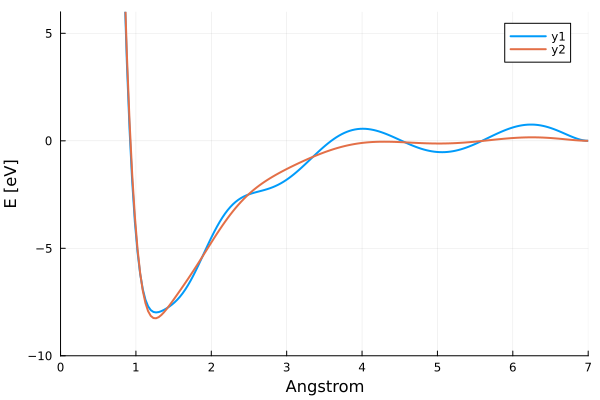

In [22]:
plt_dim = plot(
    legend = :topright, 
    xlabel = "Angstrom", ylabel = "E [eV]",
    xlims = (0, 7), ylims = (-10, 6))


D = ACEpotentials.dimers(pot_1, [:C,])
D2 = ACEpotentials.dimers(pot_2, [:C,])
plot!(plt_dim, D[(:C,:C)]..., lw=2)
plot!(plt_dim, D2[(:C,:C)]..., lw=2)
plt_dim

In [ ]:
@doc save_potential

```
save_potential( fname, potential::ACE1x.ACE1Model; save_version_numbers=true, meta=nothing)
```

Save ACE potentials. Prefix is either .json, .yml or .yace, which also determines file format.

# Kwargs

  * save*version*numbers=true  : If true save version information or relevant packages
  * `meta=nothing`             : Seve some metadata with the potential (needs to be `Dict{String, Any}`)


In [ ]:
@which save_potential

ACEpotentials

In [24]:
save_potential("/leonardo_work/Sis25_degironc_0/apol/aceconverge2025/acejulia/test_pot.json", pot_1)